### Preprocessing

In [2]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, Logit
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
import seaborn as sns
%matplotlib inline

In [3]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Wage.csv"
Wage = pd.read_csv(url, index_col='SlNo')

In [4]:
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
SlNo,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063334962759,75.0431540173515
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527250510331,70.47601964694451
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.8750612633917,130.982177377461
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041392685158231,154.68529299563
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063334962759,75.0431540173515


In [5]:
Wage.describe().round(2)

,year,age,logwage,wage
count,"3,000.0","3,000.0","3,000.0","3,000.0"
mean,"2,005.79",42.41,4.65,111.7
std,2.03,11.54,0.35,41.73
min,"2,003.0",18.0,3.0,20.09
25%,"2,004.0",33.75,4.45,85.38
50%,"2,006.0",42.0,4.65,104.92
75%,"2,008.0",51.0,4.86,128.68
max,"2,009.0",80.0,5.76,318.34


In [6]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


### Polynomial regression

In [9]:
X1 = Wage['age']
X2 = X1**2
X3 = X1**3
X4 = X1**4
y = Wage['wage']
df4 = pd.concat([X1, X2, X3, X4], axis=1)

In [10]:
lmfit = ols('y~df4', data=Wage).fit()

In [11]:
lmsummary = lmfit.summary()
lmsummary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
df4[0],21.2455,5.887,3.609,0.000,9.703,32.788
df4[1],-0.5639,0.206,-2.736,0.006,-0.968,-0.160
df4[2],0.0068,0.003,2.221,0.026,0.001,0.013
df4[3],-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [14]:
lmpred = lmfit.get_prediction(df4)
lmpred_df = lmpred.summary_frame()
lmpred_df.head().round(2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,51.93,5.3,41.54,62.32,-27.02,130.88
1,84.48,1.83,80.9,88.06,6.13,162.82
2,119.33,1.11,117.15,121.5,41.03,197.62
3,118.79,1.08,116.67,120.91,40.5,197.08
4,119.57,1.13,117.35,121.79,41.28,197.86


In [15]:
lmse = pd.DataFrame([lmpred_df['mean']-2*lmpred_df['mean_se'], lmpred_df['mean']+2*lmpred_df['mean_se']]).T
lmse.columns = ['lower', 'upper']
lmse.head().round(2)

,lower,upper
0,41.33,62.53
1,80.83,88.13
2,117.11,121.54
3,116.63,120.96
4,117.31,121.83


Text(0,0.5,'wage')

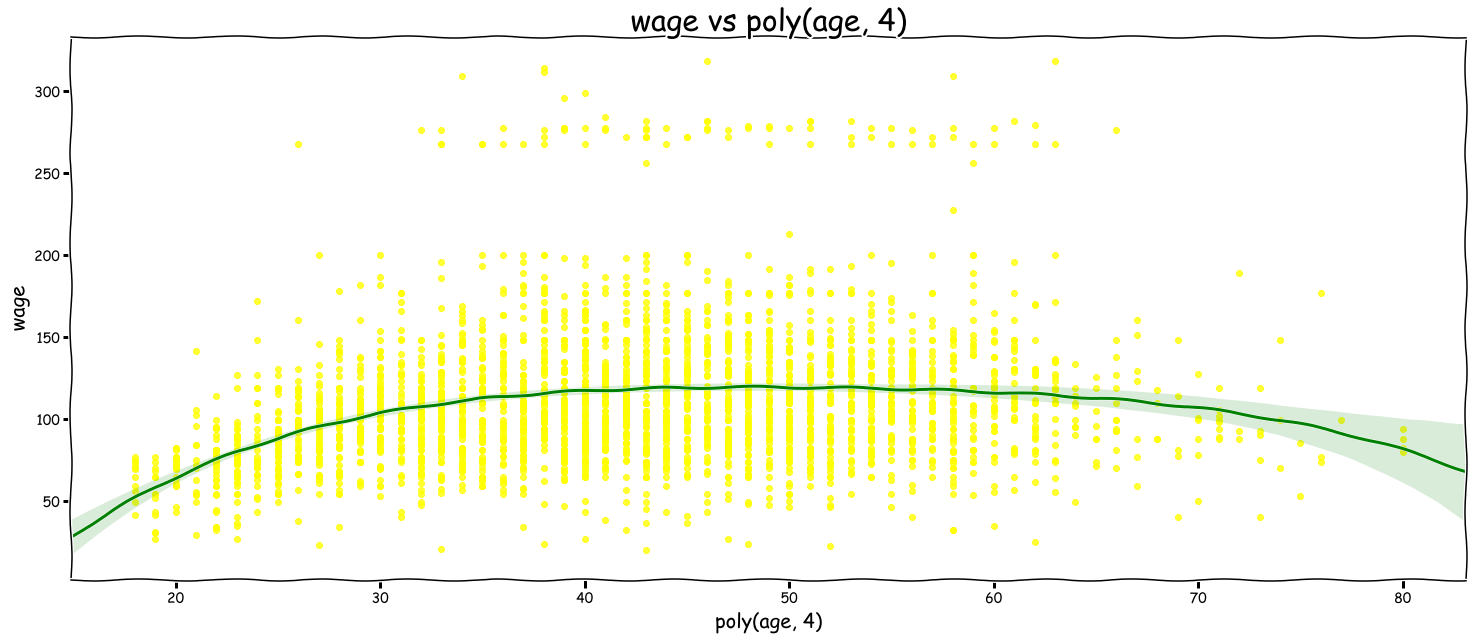

In [23]:
plotdf = pd.concat([y, X1, X2, X3, X4], axis=1)
plotdf.columns = ['wage', 'age', 'age^2', 'age^3', 'age^4']
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot('age', 'wage', data=plotdf, fit_reg=True, ci = 95, order=4, color='yellow', line_kws={'color':'green'})
plt.title('wage vs poly(age, 4)', fontsize=30)
plt.xlabel('poly(age, 4)', fontsize=20)
plt.ylabel('wage', fontsize=20)

In [25]:
df5 = pd.concat([plotdf, X1**5], axis=1)
df5.columns = ['wage', 'age', 'age^2', 'age^3', 'age^4', 'age^5']
df5.head().round(2)

,wage,age,age^2,age^3,age^4,age^5
SlNo,,,,,,
231655,75.04,18,324,5832,104976,1889568
86582,70.48,24,576,13824,331776,7962624
161300,130.98,45,2025,91125,4100625,184528125
155159,154.69,43,1849,79507,3418801,147008443
11443,75.04,50,2500,125000,6250000,312500000


In [26]:
lmfit1 = ols("df5['wage']~df5['age']", data=df5).fit()
lmfit2 = ols("df5['wage']~df5['age']+df5['age^2']", data=df5).fit()
lmfit3 = ols("df5['wage']~df5['age']+df5['age^2']+df5['age^3']", data=df5).fit()
lmfit4 = ols("df5['wage']~df5['age']+df5['age^2']+df5['age^3']+df5['age^4']", data=df5).fit()
lmfit5 = ols("df5['wage']~df5['age']+df5['age^2']+df5['age^3']+df5['age^4']+df5['age^5']", data=df5).fit()

In [28]:
anova_table = sm.stats.anova_lm(lmfit1, lmfit2, lmfit3, lmfit4, lmfit5, typ=1)
anova_table.index = anova_table.index+1
anova_table.round(6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
1,"2,998.0","5,022,216.104743",0.0,nan,nan,nan
2,"2,997.0","4,793,430.094614",1.0,"228,786.010128",143.593107,0.0
3,"2,996.0","4,777,674.40095",1.0,"15,755.693664",9.888756,0.001679
4,"2,995.0","4,771,604.248826",1.0,"6,070.152124",3.809813,0.051046
5,"2,994.0","4,770,321.68581",1.0,"1,282.563017",0.804976,0.369682


*The p-value of the cubic and quartic models border on the statistical significance level of 5%, while the quintic model is unnecessary since its p-value>5%. Therfore, the ANOVA table suggets that a cubic or quartic model should suffice to explain the relationship between age and wage.*

In [29]:
# another way to explain the aforementioned phenomena
lmfit5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-49.7046,161.435,-0.308,0.758,-366.239,266.830
df5['age'],3.9930,20.110,0.199,0.843,-35.438,43.424
df5['age^2'],0.2760,0.958,0.288,0.773,-1.603,2.155
df5['age^3'],-0.0126,0.022,-0.577,0.564,-0.056,0.030
df5['age^4'],0.0002,0.000,0.762,0.446,-0.000,0.001
df5['age^5'],-9.157e-07,1.02e-06,-0.897,0.370,-2.92e-06,1.09e-06


### Polynomial logistic regression

In [30]:
df4 = df5.drop(columns='age^5')
df4['wage'] = np.where(df4['wage']>=250, 1, 0)

In [31]:
df4['wage'].value_counts()

0    2921
1      79
Name: wage, dtype: int64

In [32]:
df4.head()

,wage,age,age^2,age^3,age^4
SlNo,,,,,
231655,0,18,324,5832,104976
86582,0,24,576,13824,331776
161300,0,45,2025,91125,4100625
155159,0,43,1849,79507,3418801
11443,0,50,2500,125000,6250000


In [33]:
logfit = sm.GLM(df4['wage'], df4[['age', 'age^2', 'age^3', 'age^4']], family=sm.families.Binomial()).fit()

In [34]:
logpred = logfit.get_prediction(df4[['age', 'age^2', 'age^3', 'age^4']])
logpred_df = logpred.summary_frame()
logpred_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
SlNo,,,,
231655,0.004836710480582377,0.0033452102821701357,0.0012431924192047568,0.018623804683171135
86582,0.005973788840181372,0.0029481699104368857,0.002265996822502147,0.015653361010591064
161300,0.03628346050435591,0.0052751290679826455,0.02724887504906556,0.04816521604096358
155159,0.03286510051940294,0.004985131544809356,0.024379624228770776,0.04417028501886833
11443,0.040933689286568764,0.005607652301676069,0.03125054644657489,0.05345165551966053


In [35]:
logse = pd.DataFrame([logpred_df['mean']-2*logpred_df['mean_se'], logpred_df['mean']+2*logpred_df['mean_se']]).T
logse.columns = ['lower', 'upper']
logse.head()

,lower,upper
SlNo,,
231655,-0.0018537100837578945,0.011527131044922648
86582,7.744901930760092e-05,0.011870128661055144
161300,0.025733202368390617,0.046833718640321195
155159,0.022894837429784227,0.042835363609021654
11443,0.029718384683216626,0.052148993889920905


### Step functions

In [36]:
df4_cut, bins = pd.cut(df4.age, 4, retbins = True, right = True)
df4_cut.value_counts()

(33.5, 49.0]      1399
(49.0, 64.5]       779
(17.938, 33.5]     750
(64.5, 80.0]        72
Name: age, dtype: int64

In [37]:
lmfit_step = ols('df4.wage~df4_cut', data=df4).fit()
lmfit_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               df4.wage   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.493
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           0.000923
Time:                        13:20:48   Log-Likelihood:                 1246.8
No. Observations:                3000   AIC:                            -2486.
Df Residuals:                    2996   BIC:                            -2462.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.0067      0.006      1.143      0.253      -0.005       0.018
df4_cut[T.Interval(33.5, 49.0, closed='right')]     0.0255      0.007      3.526      0.000       0.011       0.040
df4_cut[T.Interval(49.0, 64.5, closed='right')]     0.0293      0.008      3.581      0.000       0.013       0.045
df4_cut[T.Interval(64.5, 80.0, closed='right')]     0.0072      0.020      0.366      0.714      -0.031       0.046
==============================================================================
Omnibus:                     3292.911   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150225.326
Skew:                           5.866   Prob(JB):                         0.00
Kurtosis:                      35.621   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""